https://www.gormanalysis.com/blog/decision-trees-in-r-using-rpart/

In [ ]:

library(rpart)
train <- data.frame(
  ClaimID = c(1,2,3),
  RearEnd = c(TRUE, FALSE, TRUE),
  Fraud = c(TRUE, FALSE, TRUE)
)

train
##   ClaimID RearEnd Fraud
## 1       1    TRUE  TRUE
## 2       2   FALSE FALSE
## 3       3    TRUE  TRUE


ClaimID,RearEnd,Fraud
<dbl>,<lgl>,<lgl>
1,TRUE,TRUE
2,FALSE,FALSE
3,TRUE,TRUE


In [ ]:
library(rpart)

mytree <- rpart(
  Fraud ~ RearEnd,
  data = train,
  method = "class"
)

mytree
## n= 3
##
## node), split, n, loss, yval, (yprob)
##       * denotes terminal node
##
## 1) root 3 1 TRUE (0.3333333 0.6666667) *


n= 3 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 3 1 TRUE (0.3333333 0.6666667) *

In [ ]:
mytree <- rpart(
  Fraud ~ RearEnd,
  data = train,
  method = "class",
  minsplit = 2,
  minbucket = 1
)

mytree
## n= 3
##
## node), split, n, loss, yval, (yprob)
##       * denotes terminal node
##
## 1) root 3 1 TRUE (0.3333333 0.6666667)
##   2) RearEnd< 0.5 1 0 FALSE (1.0000000 0.0000000) *
##   3) RearEnd>=0.5 2 0 TRUE (0.0000000 1.0000000) *


n= 3 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 3 1 TRUE (0.3333333 0.6666667)  
  2) RearEnd< 0.5 1 0 FALSE (1.0000000 0.0000000) *
  3) RearEnd>=0.5 2 0 TRUE (0.0000000 1.0000000) *

In [ ]:
install.packages(rattle)
 library(rattle)
 mytree <- rpart(
  Fraud ~ RearEnd,
  data = train,
  method = "class",
  minsplit = 2,
  minbucket = 1,
  cp = -1
)

rpartPlot(mytree, caption = NULL)

ERROR: Error: object 'rattle' not found


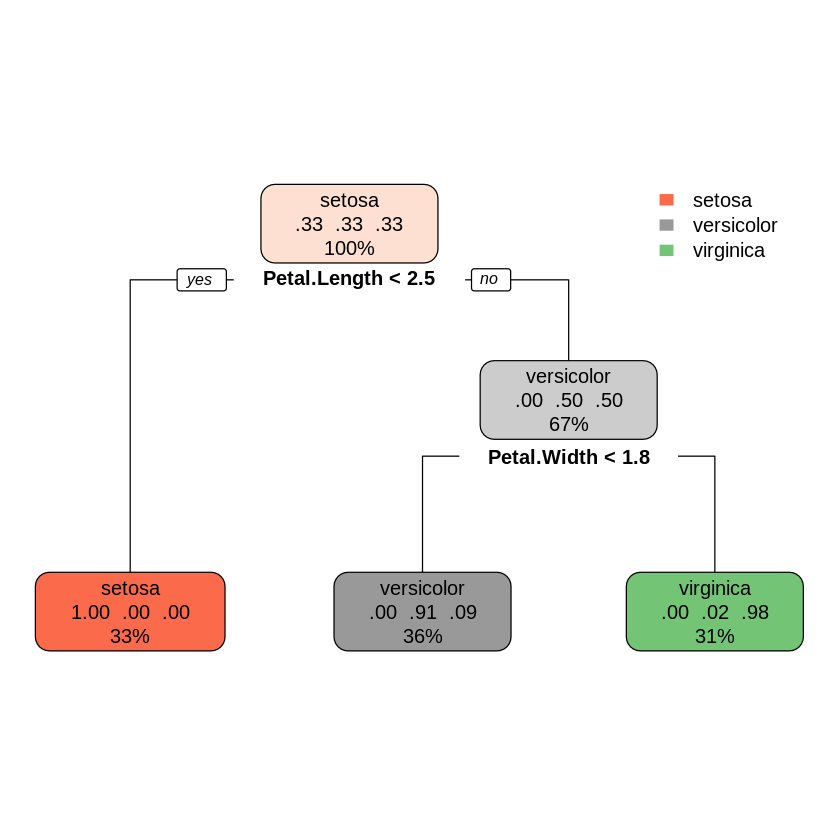

In [ ]:
#install.packages("rpart.plot")
library(rpart.plot)
fit_cp0.05 <- rpart(Species ~ ., data = iris,
                    control = rpart.control(cp = 0.05))
#rpart.plot(fit_cp0.05)

fit_cp0 <- rpart(Species ~ ., data = iris,
                 control = rpart.control(cp = 0))
rpart.plot(fit_cp0)



* * * * *

### **1\. `minsplit`**

-   **Meaning:** Minimum number of observations that must exist in a node for a split to be attempted.

-   If a node has fewer than `minsplit` observations, it will not be split further.

-   **Default:** `20`.

* * * * *

### **2\. `minbucket`**

-   **Meaning:** Minimum number of observations allowed in any terminal (leaf) node.

-   Ensures that leaves don't get too small.

-   If not specified, it defaults to **`minsplit / 3`**.

-   **Default:** `minsplit / 3` → about `7` when `minsplit=20`.

* * * * *

### **3\. `cp`** (complexity parameter)

-   **Meaning:** Threshold for cost-complexity pruning.

-   A split must decrease the overall lack-of-fit (measured by relative error, Gini, etc.) by at least a factor of `cp` to be considered.

-   Larger `cp` → smaller tree (more pruning).

-   Smaller `cp` → larger tree (more splits allowed).

-   **Default:** `0.01`.

* * * * *

### **4\. `maxdepth`**

-   **Meaning:** Maximum depth of any node in the tree (root = depth 0).

-   Prevents trees from growing too deep.

-   **Default:** `30`.

* * * * *

### **5\. `maxcompete`**

-   **Meaning:** For each split, how many competing splits are retained in the output.

-   Useful for diagnostics but not for tree shape.

-   **Default:** `4`.

* * * * *

### **6\. `maxsurrogate`**

-   **Meaning:** Maximum number of surrogate splits retained in the output.

-   Surrogate splits are alternate rules used when data is missing on the primary split variable.

-   **Default:** `5`.

* * * * *

### **7\. `usesurrogate`**

-   **Meaning:** Determines how surrogate splits are used for handling missing values.

    -   `0`: Display only.

    -   `1`: Use surrogates only if needed (default).

    -   `2`: Always use surrogates.

-   **Default:** `2` (always use).

* * * * *

### **8\. `xval`**

-   **Meaning:** Number of cross-validation folds for pruning.

-   **Default:** `10`.

* * * * *

✅ **Summary Table of Defaults (`rpart.control`)**

| Parameter | Default | Meaning |
| --- | --- | --- |
| `minsplit` | 20 | Min obs to try a split |
| `minbucket` | minsplit/3 (~7) | Min obs in terminal node |
| `cp` | 0.01 | Complexity parameter for pruning |
| `maxdepth` | 30 | Max depth of tree |
| `maxcompete` | 4 | # competing splits retained |
| `maxsurrogate` | 5 | # surrogate splits retained |
| `usesurrogate` | 2 | Surrogate usage rule |
| `xval` | 10 | # cross-validation folds |

* * * * *




* * * * *

### **Step 1. Load library and data**

```
library(rpart)
library(rpart.plot)   # for pretty plots

data(iris)

```

* * * * *

### **Step 2. Default tree**

```
fit_default <- rpart(Species ~ ., data = iris)
rpart.plot(fit_default)

```

-   Uses default controls (`minsplit=20`, `minbucket≈7`, `cp=0.01`).

-   Tree will have a few splits but not too deep.

* * * * *

### **Step 3. Increase `minsplit` (stricter split condition)**

```
fit_minsplit50 <- rpart(Species ~ ., data = iris,
                        control = rpart.control(minsplit = 50))
rpart.plot(fit_minsplit50)

```

-   Requires ≥50 obs before splitting.

-   Tree will be **smaller / underfit** because many splits are disallowed.

* * * * *

### **Step 4. Reduce `minbucket` (allow tiny leaves)**

```
fit_minbucket1 <- rpart(Species ~ ., data = iris,
                        control = rpart.control(minbucket = 1))
rpart.plot(fit_minbucket1)

```

-   Allows leaves with only **1 observation**.

-   Tree will be **very bushy / overfit**.

* * * * *

### **Step 5. Adjust `cp`**

```
fit_cp0.05 <- rpart(Species ~ ., data = iris,
                    control = rpart.control(cp = 0.05))
rpart.plot(fit_cp0.05)

fit_cp0 <- rpart(Species ~ ., data = iris,
                 control = rpart.control(cp = 0))
rpart.plot(fit_cp0)

```

-   `cp = 0.05` → much stricter pruning → **smaller tree**.

-   `cp = 0` → no pruning → **largest possible tree** (can overfit badly).

* * * * *

### **Visual effect (summary)**

-   **`minsplit ↑`** → fewer splits, simpler tree.

-   **`minbucket ↓`** → allows very small leaves, more detailed tree.

-   **`cp ↑`** → heavier pruning, simpler tree.

-   **`cp ↓`** → less pruning, more complex tree.

* * * * *
